# Задание 2. Типы шума на изображении, моделирование аддитивного шума, алгоритмы фильтрации изображений.

### 1) Моделирование аддитивного шума. (Постоянный шум)

**Импортируем OpenCV и прочее**

In [1]:
import cv2
import statistics as st
import math
import time
from IPython.display import Image
from matplotlib import pyplot as plt
import numpy as np
import random
print(cv2.__version__)

4.4.0


**Добавляем изображение**

In [2]:
img = cv2.imread("img1.jpg")

**Изображение:**

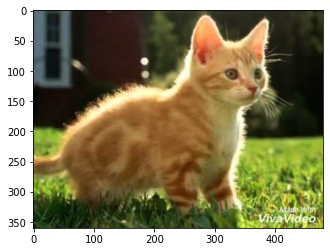

In [3]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

**Функция генерации шума с равномерным распределением.** (img - изображение для зашумления, P - вероятность шума)

In [4]:
def generate_constant_noise(img, p=0.1):
    for i, row in enumerate(img):
        for j, _ in enumerate(row):
            if random.random() < p:
                img[i][j] = [255, 255, 255]

**Зашумляем изображение**

In [5]:
generate_constant_noise(img)

**Изображение с шумом:**

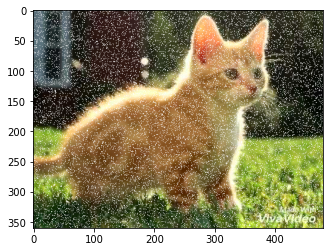

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### 2) Удаление шума. Медианный фильтр

**Добавляем изображение**

In [7]:
img = cv2.imread("img2.jpg", cv2.IMREAD_GRAYSCALE)

**Изображение:**

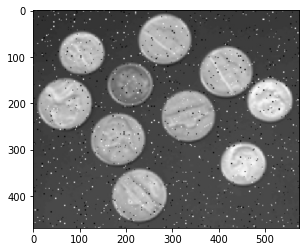

In [8]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

**OpenCV реализация**

In [9]:
start_time = time.time()
img_cv = cv2.medianBlur(img, 3)
end_time = time.time()

**Изображение:**

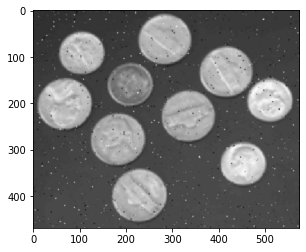

In [10]:
plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))

**Время работы:**

In [11]:
print(end_time - start_time)

0.0009961128234863281


**Реализуем медианный фильтр**

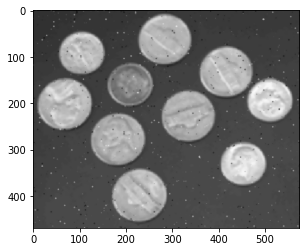

In [12]:
start_time = time.time()

img_my = img
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        img_my[y,x]=img[y,x]
members=[img[0,0]]*9
for y in range(1,img.shape[0]-1):
    for x in range(1,img.shape[1]-1):
        members[0] = img[y-1,x-1]
        members[1] = img[y,x-1]
        members[2] = img[y+1,x-1]
        members[3] = img[y-1,x]
        members[4] = img[y,x]
        members[5] = img[y+1,x]
        members[6] = img[y-1,x+1]
        members[7] = img[y,x+1]
        members[8] = img[y+1,x+1]

        members.sort()
        img_my[y,x]=members[4]
        
end_time = time.time()
plt.imshow(cv2.cvtColor(img_my, cv2.COLOR_BGR2RGB))

**Время работы**

In [13]:
print(end_time - start_time)

1.3055636882781982


**Сравниваем качество с помощью PSNR для иображения в оттенках серого**

In [14]:
def psnr(image_1, image_2):
    image_change = (image_1 - image_2) ** 2

    MSE = st.fmean([pixel for row in image_change for pixel in row])

    MAX_I = 2 ** 8

    PSNR = 10 * math.log10(MAX_I ** 2 / MSE);
    return PSNR

In [15]:
print(psnr(img_cv, img_my))

44.40441017970973
